<a href="https://colab.research.google.com/github/kehkasha18/Projects/blob/main/Random_Forest_Classifier___HolidayPackagePrediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **Problem Statement:**

"Trips & Travel.Com" company wants to enable and establish a viable business model to expand the customer base. One of the ways to expand the customer base is to introduce a new offering of packages. Currently, there are 5 types of packages the company is offering - Basic, Standard, Deluxe, Super Deluxe, King. Looking at the data of the last year, we observed that 18% of the customers purchased the packages. However, the marketing cost was quite high because customers were contacted at random without looking at the available information. The company is now planning to launch a new product i.e. Wellness Tourism Package. Wellness Tourism is defined as Travel that allows the traveler to maintain, enhance or kick-start a healthy lifestyle, and support or increase one's sense of well-being. However, this time company wants to harness the available data of existing and potential customers to make the marketing expenditure more efficient.

### **Content**
What's inside is more than just rows and columns. Make it easy for others to get started by describing how you acquired the data and what time period it represents, too.

Most important features that have an impact on Product taken: Designation, Passport, Tier City, Martial status, occupation
Customers with Designation as Executive should be the target customers for the company .Customers who have passport and are from tier 3 city and are single or unmarried, have large business such customers have higher chances of taking new package.
Customers monthly income in range of 15000- 25000, and age range 15-30, prefer 5 star properties also have higher chances of taking new package based on EDA.

### **Inspiration**
We need to analyze the customers' data and information to provide recommendations to the Policy Maker and Marketing Team and also build a model to predict the potential customer who is going to purchase the newly introduced travel package.

####**Tasks to Solve :**
* To predict which customer is more likely to purchase the newly introduced travel package
* Which variables are most significant.
* Which segment of customers should be targeted more.

In [4]:
#importing important libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import warnings
warnings.filterwarnings('ignore')


In [5]:
df = pd.read_csv("Travel.csv")

In [6]:
df.head()

,CustomerID,ProdTaken,Age,TypeofContact,CityTier,DurationOfPitch,Occupation,Gender,NumberOfPersonVisiting,NumberOfFollowups,ProductPitched,PreferredPropertyStar,MaritalStatus,NumberOfTrips,Passport,PitchSatisfactionScore,OwnCar,NumberOfChildrenVisiting,Designation,MonthlyIncome
0,200000,1,41.0,Self Enquiry,3,6.0,Salaried,Female,3,3.0,Deluxe,3.0,Single,1.0,1,2,1,0.0,Manager,20993.0
1,200001,0,49.0,Company Invited,1,14.0,Salaried,Male,3,4.0,Deluxe,4.0,Divorced,2.0,0,3,1,2.0,Manager,20130.0
2,200002,1,37.0,Self Enquiry,1,8.0,Free Lancer,Male,3,4.0,Basic,3.0,Single,7.0,1,3,0,0.0,Executive,17090.0
3,200003,0,33.0,Company Invited,1,9.0,Salaried,Female,2,3.0,Basic,3.0,Divorced,2.0,1,5,1,1.0,Executive,17909.0
4,200004,0,NaN,Self Enquiry,1,8.0,Small Business,Male,2,3.0,Basic,4.0,Divorced,1.0,0,5,1,0.0,Executive,18468.0


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4888 entries, 0 to 4887
Data columns (total 20 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   CustomerID                4888 non-null   int64  
 1   ProdTaken                 4888 non-null   int64  
 2   Age                       4662 non-null   float64
 3   TypeofContact             4863 non-null   object 
 4   CityTier                  4888 non-null   int64  
 5   DurationOfPitch           4637 non-null   float64
 6   Occupation                4888 non-null   object 
 7   Gender                    4888 non-null   object 
 8   NumberOfPersonVisiting    4888 non-null   int64  
 9   NumberOfFollowups         4843 non-null   float64
 10  ProductPitched            4888 non-null   object 
 11  PreferredPropertyStar     4862 non-null   float64
 12  MaritalStatus             4888 non-null   object 
 13  NumberOfTrips             4748 non-null   float64
 14  Passport

##**Data Cleaning**
###**Handling Missing Values:**


In [8]:
# check for missing values:
df.isnull().sum()

,0
CustomerID,0
ProdTaken,0
Age,226
TypeofContact,25
CityTier,0
DurationOfPitch,251
Occupation,0
Gender,0
NumberOfPersonVisiting,0
NumberOfFollowups,45


In [9]:
#Features with nan value - categorical and numerical
x=[features for features in df.columns if df[features].isnull().sum()>=1]

In [10]:
x

['Age',
 'TypeofContact',
 'DurationOfPitch',
 'NumberOfFollowups',
 'PreferredPropertyStar',
 'NumberOfTrips',
 'NumberOfChildrenVisiting',
 'MonthlyIncome']

In [11]:
# Identify columns with missing values
x = [features for features in df.columns if df[features].isnull().sum() >= 1]

# Loop through each column that has missing values
for feature in x: #Loops through each column stored in x.
    missing_percentage = np.round(df[feature].isnull().mean() * 100, 5)  # Calculate missing percentage
    print(feature,":", missing_percentage, "% missing values")  # Display feature name and missing %


Age : 4.62357 % missing values
TypeofContact : 0.51146 % missing values
DurationOfPitch : 5.13502 % missing values
NumberOfFollowups : 0.92062 % missing values
PreferredPropertyStar : 0.53191 % missing values
NumberOfTrips : 2.86416 % missing values
NumberOfChildrenVisiting : 1.35025 % missing values
MonthlyIncome : 4.76678 % missing values


#Visualizing the missing data

<Axes: >

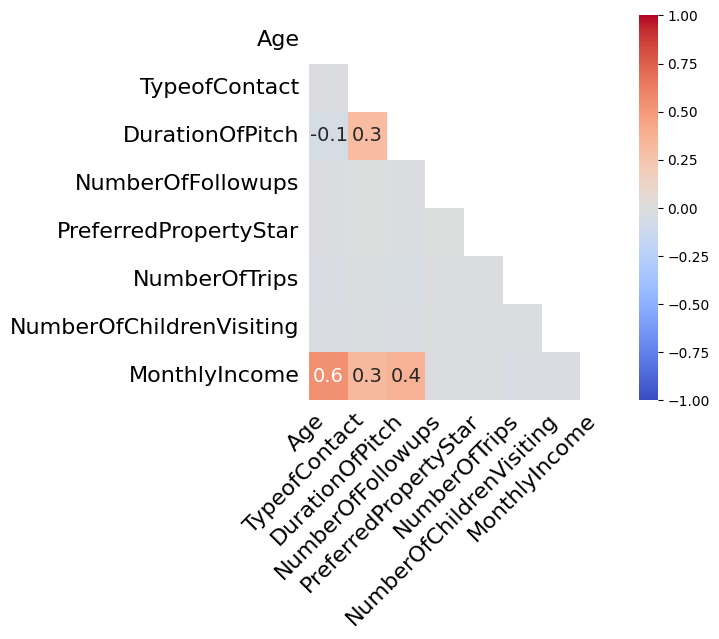

In [8]:
import missingno as msno
import matplotlib.pyplot as plt
import seaborn as sns

# Create a new figure with a fixed size
fig, ax = plt.subplots(figsize=(5, 5))  # Adjust width and height

# Generate the heatmap on the given axes
msno.heatmap(df, ax=ax, cmap="coolwarm")

<Axes: >

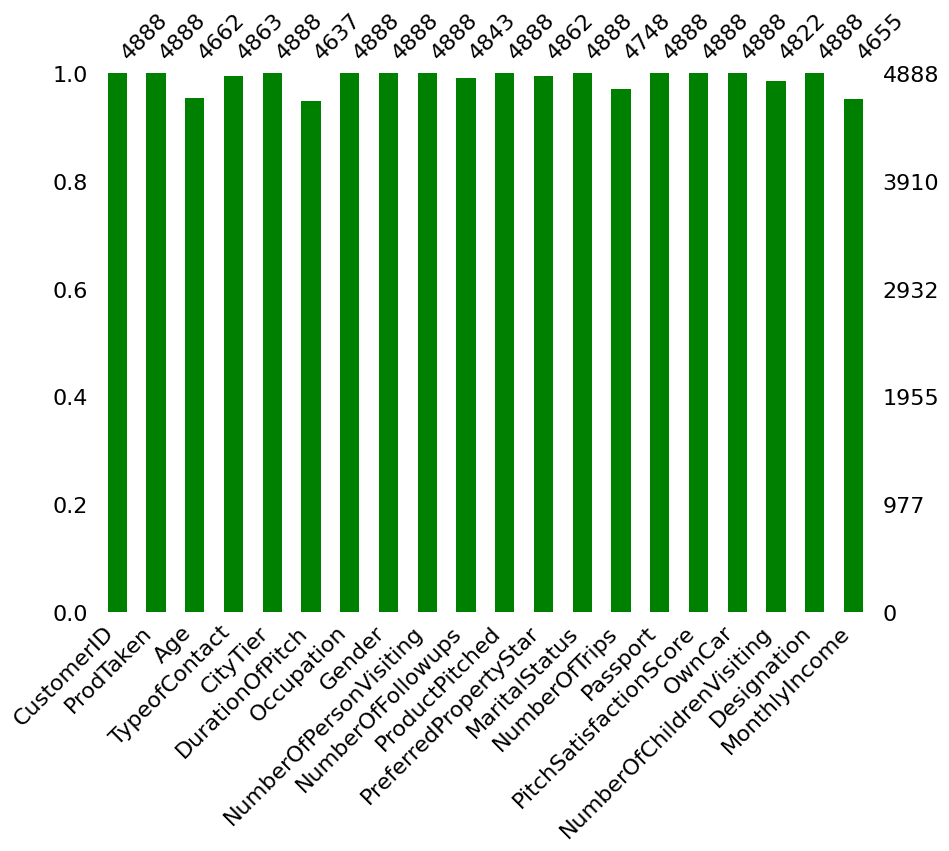

In [9]:
# Visualize missing values as a bar chart
fig,ax = plt.subplots(figsize=(10,7))
msno.bar(df, ax=ax,color ="green")

In [12]:
df[x].select_dtypes(exclude="object").describe()

,Age,DurationOfPitch,NumberOfFollowups,PreferredPropertyStar,NumberOfTrips,NumberOfChildrenVisiting,MonthlyIncome
count,4662.000000,4637.000000,4843.000000,4862.000000,4748.000000,4822.000000,4655.000000
mean,37.622265,15.490835,3.708445,3.581037,3.236521,1.187267,23619.853491
std,9.316387,8.519643,1.002509,0.798009,1.849019,0.857861,5380.698361
min,18.000000,5.000000,1.000000,3.000000,1.000000,0.000000,1000.000000
25%,31.000000,9.000000,3.000000,3.000000,2.000000,1.000000,20346.000000
50%,36.000000,13.000000,4.000000,3.000000,3.000000,1.000000,22347.000000
75%,44.000000,20.000000,4.000000,4.000000,4.000000,2.000000,25571.000000
max,61.000000,127.000000,6.000000,5.000000,22.000000,3.000000,98678.000000


## Imputing Null Values :
* Impute median value for Agecolumn
* Impute mode for Type of contract
* Impute median for duration of pitch
* Impute Mode for NumberOfFollowUps as it is discrete feature
* Impute mode for preferredPropertyStar
* Impute Median for NumberOfTrips
* Impute Mode for NumberOfChildVisiting
* Impute Median for MonthlyIncome


### **Why Mean, Median, or Mode for Imputation?**
When handling missing values, we choose **mean, median, or mode** based on the nature of the data:  
- **Mean** (Average) is sensitive to outliers, so it is best for normally distributed numerical data.  
- **Median** (Middle Value) is resistant to outliers, making it better for skewed numerical data.  
- **Mode** (Most Frequent Value) is best for categorical or discrete numerical data.

---


Let's break down why each column is imputed with **median** or **mode**:

| **Column**                  | **Dtype**  | **Why This Method?** |
|-----------------------------|-----------|----------------------|
| **Age**                     | `float64` | Use **Median** because age is a continuous numerical variable and might be skewed (e.g., more young people than older ones). The median is more robust to outliers. |
| **TypeofContact**           | `object`  | Use **Mode** because it is categorical. The most frequent type of contact is a good assumption for missing values. |
| **DurationOfPitch**         | `float64` | Use **Median** because it is a numerical variable that may have outliers (some pitches may be unusually long). The median will prevent skewing the data. |
| **NumberOfFollowups**       | `float64` | Use **Mode** because it is a discrete numerical feature (count of follow-ups). Mode is better suited for count-based data. |
| **PreferredPropertyStar**   | `float64` | Use **Mode** because it is an ordinal categorical variable (e.g., 3-star, 4-star, 5-star ratings). People usually select a few common values, so mode makes sense. |
| **NumberOfTrips**           | `float64` | Use **Median** because it is a continuous variable, but likely skewed. The median ensures extreme values (frequent travelers) don't distort the data. |
| **NumberOfChildrenVisiting**| `float64` | Use **Mode** because it is a discrete count (number of children). A mode-based approach ensures realistic numbers. |
| **MonthlyIncome**           | `float64` | Use **Median** because income tends to be **highly skewed** (a few high earners can pull the mean up). The median is more representative. |

---

### **Summary: When to Use Mean, Median, or Mode**
✅ **Mean** → Good for normally distributed numerical data (Not used here due to skewness).  
✅ **Median** → Best for continuous numerical features with potential outliers (e.g., **Age, DurationOfPitch, MonthlyIncome, NumberOfTrips**).  
✅ **Mode** → Best for categorical or discrete numerical data (e.g., **TypeofContact, NumberOfFollowups, PreferredPropertyStar, NumberOfChildrenVisiting**).  



In [13]:
# Imputing Null Values :
df.Age.fillna(df.Age.median(),inplace=True)
df.TypeofContact.fillna(df.TypeofContact.mode()[0],inplace=True)
df.DurationOfPitch.fillna(df.DurationOfPitch.median(),inplace=True)
df.NumberOfFollowups.fillna(df.NumberOfFollowups.mode()[0],inplace=True)
df.PreferredPropertyStar.fillna(df.PreferredPropertyStar.mode()[0],inplace=True)
df.NumberOfChildrenVisiting.fillna(df.NumberOfChildrenVisiting.mode()[0],inplace=True)
df.MonthlyIncome.fillna(df.MonthlyIncome.median(),inplace=True)
df.NumberOfTrips.fillna(df.NumberOfTrips.median(),inplace=True)

In [14]:
df.isnull().sum() #No null values after Imputation

,0
CustomerID,0
ProdTaken,0
Age,0
TypeofContact,0
CityTier,0
DurationOfPitch,0
Occupation,0
Gender,0
NumberOfPersonVisiting,0
NumberOfFollowups,0


In [15]:
# Since customer ID is not important , we will drop it
df.drop("CustomerID",inplace=True,axis=1)

In [16]:
df.head()

,ProdTaken,Age,TypeofContact,CityTier,DurationOfPitch,Occupation,Gender,NumberOfPersonVisiting,NumberOfFollowups,ProductPitched,PreferredPropertyStar,MaritalStatus,NumberOfTrips,Passport,PitchSatisfactionScore,OwnCar,NumberOfChildrenVisiting,Designation,MonthlyIncome
0,1,41.0,Self Enquiry,3,6.0,Salaried,Female,3,3.0,Deluxe,3.0,Single,1.0,1,2,1,0.0,Manager,20993.0
1,0,49.0,Company Invited,1,14.0,Salaried,Male,3,4.0,Deluxe,4.0,Divorced,2.0,0,3,1,2.0,Manager,20130.0
2,1,37.0,Self Enquiry,1,8.0,Free Lancer,Male,3,4.0,Basic,3.0,Single,7.0,1,3,0,0.0,Executive,17090.0
3,0,33.0,Company Invited,1,9.0,Salaried,Female,2,3.0,Basic,3.0,Divorced,2.0,1,5,1,1.0,Executive,17909.0
4,0,36.0,Self Enquiry,1,8.0,Small Business,Male,2,3.0,Basic,4.0,Divorced,1.0,0,5,1,0.0,Executive,18468.0


### Checking for Class Imbalance in Categorical Features  
Analyzing whether the distribution of categories is balanced or skewed, which could impact model performance.

In [17]:
df["Gender"].value_counts()

,count
Gender,
Male,2916
Female,1817
Fe Male,155


**Insight:** The "Gender" column reveals an inconsistency in categorical values, with three distinct entries: **"Male" (2,916), "Female" (1,817), and "Fe Male" (155).** The presence of "Fe Male" suggests a data entry error, which, if left uncorrected, could lead to inaccurate analysis and biased insights.  

 **Next Steps:** Standardize the gender values by merging "Fe Male" into "Female" to maintain data integrity and ensure consistency in analysis.

In [18]:
df["MaritalStatus"].value_counts()

,count
MaritalStatus,
Married,2340
Divorced,950
Single,916
Unmarried,682


### Insight:  
The **MaritalStatus** column contains four categories: **Married, Divorced, Single, and Unmarried**. However, "Single" and "Unmarried" seem to convey the same meaning, indicating potential redundancy or inconsistency in labeling. Standardizing these categories can help improve data quality and avoid misinterpretations in analysis.

In [19]:
df["TypeofContact"].value_counts() #looks good

,count
TypeofContact,
Self Enquiry,3469
Company Invited,1419


In [18]:
df["Occupation"].value_counts()

,count
Occupation,
Salaried,2368
Small Business,2084
Large Business,434
Free Lancer,2


In [20]:
# Display value counts for each categorical column with bold headings
for col in df.select_dtypes(include=['object']).columns:
    print(f"\033[1mFeature: {col}\033[0m")  # Bold text -\033[1m starts bold formatting. \033[0m resets formatting back to normal.
    print(df[col].value_counts(), "\n" + "-"*40 + "\n") #Adds separators ("-"*40) for better clarity between different columns.

Feature: TypeofContact
TypeofContact
Self Enquiry       3469
Company Invited    1419
Name: count, dtype: int64 
----------------------------------------

Feature: Occupation
Occupation
Salaried          2368
Small Business    2084
Large Business     434
Free Lancer          2
Name: count, dtype: int64 
----------------------------------------

Feature: Gender
Gender
Male       2916
Female     1817
Fe Male     155
Name: count, dtype: int64 
----------------------------------------

Feature: ProductPitched
ProductPitched
Basic           1842
Deluxe          1732
Standard         742
Super Deluxe     342
King             230
Name: count, dtype: int64 
----------------------------------------

Feature: MaritalStatus
MaritalStatus
Married      2340
Divorced      950
Single        916
Unmarried     682
Name: count, dtype: int64 
----------------------------------------

Feature: Designation
Designation
Executive         1842
Manager           1732
Senior Manager     742
AVP                34

In [21]:
df["Gender"] = df["Gender"].replace("Fe male" , "Female")
df["MaritalStatus"] = df["MaritalStatus"].replace("single" , "unmarried")

In [22]:
print(df["Gender"].value_counts(),"\n")
print(df["MaritalStatus"].value_counts())

Gender
Male       2916
Female     1817
Fe Male     155
Name: count, dtype: int64 

MaritalStatus
Married      2340
Divorced      950
Single        916
Unmarried     682
Name: count, dtype: int64


##**Feature Engineering**

###**Feature Extraction:**

In [23]:
#create new column for feature
df["TotalVisits"] = df["NumberOfPersonVisiting"] + df["NumberOfChildrenVisiting"]
df.drop(["NumberOfPersonVisiting","NumberOfChildrenVisiting"],axis=1,inplace=True)

In [24]:
df.head()

,ProdTaken,Age,TypeofContact,CityTier,DurationOfPitch,Occupation,Gender,NumberOfFollowups,ProductPitched,PreferredPropertyStar,MaritalStatus,NumberOfTrips,Passport,PitchSatisfactionScore,OwnCar,Designation,MonthlyIncome,TotalVisits
0,1,41.0,Self Enquiry,3,6.0,Salaried,Female,3.0,Deluxe,3.0,Single,1.0,1,2,1,Manager,20993.0,3.0
1,0,49.0,Company Invited,1,14.0,Salaried,Male,4.0,Deluxe,4.0,Divorced,2.0,0,3,1,Manager,20130.0,5.0
2,1,37.0,Self Enquiry,1,8.0,Free Lancer,Male,4.0,Basic,3.0,Single,7.0,1,3,0,Executive,17090.0,3.0
3,0,33.0,Company Invited,1,9.0,Salaried,Female,3.0,Basic,3.0,Divorced,2.0,1,5,1,Executive,17909.0,3.0
4,0,36.0,Self Enquiry,1,8.0,Small Business,Male,3.0,Basic,4.0,Divorced,1.0,0,5,1,Executive,18468.0,2.0


In [25]:
#Get all the Numerical Features
num_features = [feature for feature in df.columns if df[feature].dtype != "O"]
print( "Number of features :" , len(num_features))

Number of features : 12


In [26]:
#Get all the categorical Features:
cat_features = [feature for feature in df.columns if df[feature].dtype =="O"]
print("Number of features :" , len(cat_features))

Number of features : 6


In [27]:
#Get all the discrete features:
discrete_feature = [feature for feature in num_features if len(df[feature].unique())<25]
print("Number of discrete features :" , len(discrete_feature))

Number of discrete features : 9


In [28]:
#Get number of continous features :
continous_feature = [feature for feature in num_features if feature not in discrete_feature]
print("Number of continous features :" , len(continous_feature))

Number of continous features : 3


### Let’s talk about **discrete and continuous** features and why I chose 25 as the threshold for discrete features.

### **1. What are Discrete Features?**
Discrete features are numerical variables that have a **fixed number of unique values**. They are countable and usually represent **categorical-like data** but in numeric form. For example, if we have a dataset with a **City Tier** column that has values 1, 2, and 3, it’s a discrete feature because it has a small, **finite number of categories**.

Now, to identify discrete features in our dataset, I used this condition in my code:
```python
discrete_feature = [feature for feature in num_features if len(df[feature].unique()) <= 25]
```
This means that if a numerical feature has **25 or fewer unique values**, I classify it as **discrete**.

### **2. Why Did I Choose 25 as the Cutoff?**
I chose 25 as a reasonable threshold because:
- **Categorical features typically have fewer categories** (like Male/Female, Yes/No, or a few distinct groups).  
- **Discrete features can have a bit more variety** (like Number of Follow-ups: 1, 2, 3, 4, ... up to 10-15).
- If a feature has **too many unique values (let’s say 100 or 500)**, it starts behaving more like a continuous feature rather than discrete.
- **Pin codes are a great example**—a dataset might have 20-25 unique pin codes, which makes them discrete, not continuous.

### **3. What About Continuous Features?**
Continuous features are numerical values that **can take an infinite number of possibilities** within a given range. Think of **Age or Monthly Income**—these don’t have a fixed set of values; they vary **smoothly**.

To get continuous features, I simply took all **numerical** features that are **not in the discrete features list**:
```python
continous_feature = [feature for feature in num_features if feature not in discrete_feature]
```

### **4. Why is This Important?**
Classifying features correctly helps in **handling missing values and applying proper statistical techniques**:
- **Discrete Features** → Often imputed with **mode** (most frequent value).  
- **Continuous Features** → Usually imputed with **mean or median**, depending on whether the data is skewed.

So, by categorizing features as discrete or continuous, I can **choose the right approach** for cleaning and analyzing the data efficiently!"

---


##**Feature Engineering Part 2**
###**Train Test Split and Model Training**

In [29]:
from sklearn.model_selection import train_test_split
x = df.drop(["ProdTaken"],axis = 1)
y = df["ProdTaken"]
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=42)

In [30]:
x_train.shape , x_test.shape

((3910, 17), (978, 17))

In [31]:
y_train.shape , y_test.shape

((3910,), (978,))

**Applying Transformations Using ColumnTransformer: OneHotEncoding & Standard Scaling**

In [32]:
#create column Transformer with 3 types of transformers
cat_features = x.select_dtypes(include="object").columns
num_features = x.select_dtypes(exclude="object").columns
from sklearn.preprocessing import OneHotEncoder,StandardScaler
from sklearn.compose import ColumnTransformer

num_transformer = StandardScaler() # Define the StandardScaler for numerical features to standardize them
oh_transformer = OneHotEncoder() # Define OneHotEncoder for categorical features to convert them into numerical format
## Create a ColumnTransformer to apply different transformations to different feature types
preprocessor = ColumnTransformer(
    [
        ("OneHotEncoder",oh_transformer,cat_features),# Apply OneHotEncoder to categorical features
        ("StandardScaler",num_transformer,num_features) # Apply StandardScaler to numerical features
    ]

)

In [33]:
preprocessor

ColumnTransformer(transformers=[('OneHotEncoder', OneHotEncoder(),
                                 Index(['TypeofContact', 'Occupation', 'Gender', 'ProductPitched',
       'MaritalStatus', 'Designation'],
      dtype='object')),
                                ('StandardScaler', StandardScaler(),
                                 Index(['Age', 'CityTier', 'DurationOfPitch', 'NumberOfFollowups',
       'PreferredPropertyStar', 'NumberOfTrips', 'Passport',
       'PitchSatisfactionScore', 'OwnCar', 'MonthlyIncome', 'TotalVisits'],
      dtype='object'))])

In [37]:
#Apply transformation in training - use fit_transform()
x_train = preprocessor.fit_transform(x_train)


In [38]:
pd.DataFrame(x_train) .shape

(3910, 34)

In [39]:
x_test.shape

(978, 17)

In [40]:
x_test = preprocessor.transform(x_test) # transforming the test data via (transform)


In [41]:
x_test.shape

(978, 34)

## **Random Forest Classifier Training:**

In [42]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report,precision_score,recall_score,f1_score,roc_auc_score,roc_curve


In [48]:
models = {
          "RF":RandomForestClassifier(),
          "DT":DecisionTreeClassifier(),
          "LR":LogisticRegression()
         }
for i in range(len(list(models))):
    model = list(models.values())[i]
    model.fit(x_train,y_train) # Train the models

    # Make predictions
    y_pred_train = model.predict(x_train)
    y_pred_test = model.predict(x_test)

    # Training set Performance

    acc1 = accuracy_score(y_train,y_pred_train)
    prec1 = precision_score(y_train,y_pred_train)
    recall1 = recall_score(y_train,y_pred_train)
    f1_score1 = f1_score(y_train,y_pred_train,average="weighted")
    roc_auc1 = roc_auc_score(y_train,y_pred_train)


    # Testing set Performance

    acc2 = accuracy_score(y_test,y_pred_test)
    prec2 = precision_score(y_test,y_pred_test)
    recall2 = recall_score(y_test,y_pred_test)
    f1_score2 = f1_score(y_test,y_pred_test,average="weighted")
    roc_auc2 = roc_auc_score(y_test,y_pred_test)

    # Print model name
    print(list(models.keys())[i])
    print("-" * 50)

    # Print Training Performance
    print("Model Performance on Training Data")
    print(f"Accuracy: {acc1:.4f}")
    print(f"Precision: {prec1:.4f}")
    print(f"Recall: {recall1:.4f}")
    print(f"F1 Score: {f1_score1:.4f}")
    print(f"ROC AUC: {roc_auc1:.4f}")

    #print("-" * 50)

    # Print Testing Performance
    print("\033[1mModel Performance on Testing Data\033[0m")
    print(f"Accuracy: {acc2:.4f}")
    print(f"Precision: {prec2:.4f}")
    print(f"Recall: {recall2:.4f}")
    print(f"F1 Score: {f1_score2:.4f}")
    print(f"ROC AUC: {roc_auc2:.4f}")

    print("-" * 50)


RF
--------------------------------------------------
Model Performance on Training Data
Accuracy: 1.0000
Precision: 1.0000
Recall: 1.0000
F1 Score: 1.0000
ROC AUC: 1.0000
Model Performance on Testing Data
Accuracy: 0.9100
Precision: 0.9558
Recall: 0.5654
F1 Score: 0.9006
ROC AUC: 0.7795
--------------------------------------------------
DT
--------------------------------------------------
Model Performance on Training Data
Accuracy: 1.0000
Precision: 1.0000
Recall: 1.0000
F1 Score: 1.0000
ROC AUC: 1.0000
Model Performance on Testing Data
Accuracy: 0.9080
Precision: 0.7672
Recall: 0.7592
F1 Score: 0.9078
ROC AUC: 0.8516
--------------------------------------------------
LR
--------------------------------------------------
Model Performance on Training Data
Accuracy: 0.8450
Precision: 0.6892
Recall: 0.3073
F1 Score: 0.8199
ROC AUC: 0.6378
Model Performance on Testing Data
Accuracy: 0.8374
Precision: 0.6860
Recall: 0.3089
F1 Score: 0.8117
ROC AUC: 0.6373
-------------------------------

### HyperParameter Tuning:


In [53]:
rf_params = {"max_depth": [5,8,15,None,10],
             "max_features": [5,7,"auto",8],
             "min_samples_split": [2,8,15,20],
             "n_estimators": [100,200,500,1000]}

In [50]:
rf_params

{'max_depth ': [5, 8, 15, None, 10],
 'max_features': [5, 7, 'auto', 8],
 'min_samples_split': [2, 8, 15, 20],
 'n_estimators': [100, 200, 500, 1000]}

In [54]:
#Models list for hyperparameter tuning:
randomCV_models = [("RF",RandomForestClassifier(),rf_params)]
#

In [55]:
from sklearn.model_selection import RandomizedSearchCV
model_params = {}
for name,model,params in randomCV_models:
    rs_cv = RandomizedSearchCV(model,params,cv=3,n_iter=100,verbose=2,n_jobs=-1)
    rs_cv.fit(x_train,y_train)
    model_params[name] = rs_cv.best_params_
for model_name in model_params:
    print(f"Best Parameters for {model_name}: {model_params[model_name]}")

Fitting 3 folds for each of 100 candidates, totalling 300 fits
Best Parameters for RF: {'n_estimators': 500, 'min_samples_split': 2, 'max_features': 8, 'max_depth': 15}


In [56]:
models = {
          "RF":RandomForestClassifier(n_estimators=500,min_samples_split=2,max_features=8,max_depth=15),

         }
for i in range(len(list(models))):
    model = list(models.values())[i]
    model.fit(x_train,y_train) # Train the models

    # Make predictions
    y_pred_train = model.predict(x_train)
    y_pred_test = model.predict(x_test)

    # Training set Performance

    acc1 = accuracy_score(y_train,y_pred_train)
    prec1 = precision_score(y_train,y_pred_train)
    recall1 = recall_score(y_train,y_pred_train)
    f1_score1 = f1_score(y_train,y_pred_train,average="weighted")
    roc_auc1 = roc_auc_score(y_train,y_pred_train)


    # Testing set Performance

    acc2 = accuracy_score(y_test,y_pred_test)
    prec2 = precision_score(y_test,y_pred_test)
    recall2 = recall_score(y_test,y_pred_test)
    f1_score2 = f1_score(y_test,y_pred_test,average="weighted")
    roc_auc2 = roc_auc_score(y_test,y_pred_test)

    # Print model name
    print(list(models.keys())[i])
    print("-" * 50)

    # Print Training Performance
    print("Model Performance on Training Data")
    print(f"Accuracy: {acc1:.4f}")
    print(f"Precision: {prec1:.4f}")
    print(f"Recall: {recall1:.4f}")
    print(f"F1 Score: {f1_score1:.4f}")
    print(f"ROC AUC: {roc_auc1:.4f}")

    #print("-" * 50)

    # Print Testing Performance
    print("\033[1mModel Performance on Testing Data\033[0m")
    print(f"Accuracy: {acc2:.4f}")
    print(f"Precision: {prec2:.4f}")
    print(f"Recall: {recall2:.4f}")
    print(f"F1 Score: {f1_score2:.4f}")
    print(f"ROC AUC: {roc_auc2:.4f}")

    print("-" * 50)


RF
--------------------------------------------------
Model Performance on Training Data
Accuracy: 0.9987
Precision: 1.0000
Recall: 0.9931
F1 Score: 0.9987
ROC AUC: 0.9966
Model Performance on Testing Data
Accuracy: 0.9202
Precision: 0.9449
Recall: 0.6283
F1 Score: 0.9138
ROC AUC: 0.8097
--------------------------------------------------


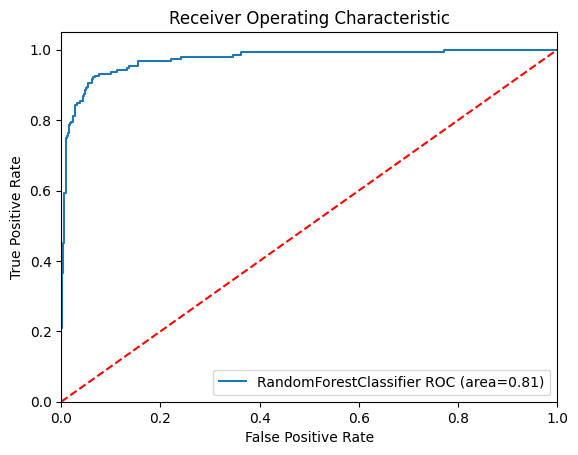

In [57]:
#Plot ROC AUC Curve:
from sklearn.metrics import roc_curve, roc_auc_score
plt.figure()

auc_models = [
{
    "label":"RandomForestClassifier",
     "model": RandomForestClassifier(n_estimators=500,min_samples_split=2,max_features=8,max_depth=15),
     "auc": 0.8097
},
]

#create loop through all models:
for algo in auc_models:
    model = algo["model"]
    model.fit(x_train,y_train)
    fpr,tpr,thresholds = roc_curve(y_test,model.predict_proba(x_test)[:,1])
    plt.plot(fpr,tpr,label="%s ROC (area=%0.2f)" % (algo["label"],algo["auc"]))
    plt.plot([0,1],[0,1],"r--")
    plt.xlim([0.0,1.0])
    plt.ylim([0.0,1.05])
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")
    plt.title("Receiver Operating Characteristic")
    plt.legend(loc="lower right")
    plt.savefig("auc.png")
    plt.show()


### **How ANSI Escape Codes Work**
ANSI escape codes are sequences of characters that tell the terminal how to format the text.  
They always start with `\033[` (or `\x1b[`), followed by specific numbers that define the style.

#### **Basic Formatting Codes**
| Code         | Effect |
|-------------|--------|
| `\033[1m`   | Bold Text |
| `\033[3m`   | Italic Text |
| `\033[4m`   | Underline |
| `\033[0m`   | Reset (Back to Normal) |

---

### **How Does It Work?**
When you print:  
```python
print("\033[1mThis is bold text\033[0m and this is normal.")
```
1. `\033[1m` → Turns on **bold** formatting.  
2. `"This is bold text"` → This part is displayed in **bold**.  
3. `\033[0m` → Resets the text style back to normal.  
4. `"and this is normal."` → This part appears as regular text.  



### **Concept Explanation:**
1. **OneHotEncoder (OHE)**  
   - Categorical features (like "Gender" with values **Male/Female**) cannot be used directly in machine learning models.  
   - OneHotEncoding converts each unique category into separate binary (0/1) columns.  
   - Example:  
     ```
     Gender  →  Male  Female  
     Male    →  1     0  
     Female  →  0     1  
     ```
   - This helps ML models understand categorical data in a numerical format.

2. **StandardScaler**  
   - Used for numerical features to bring all values to a similar scale.  
   - It standardizes data by subtracting the mean and dividing by the standard deviation:  
     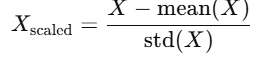
   - Example:  
     ```
     Original Age: [20, 50, 80]
     Scaled Age: [-1.2, 0.5, 1.7]  (values now centered around 0)
     ```
   - Helps models perform better by ensuring no feature dominates due to large numbers.

3. **ColumnTransformer**  
   - Different types of features need different transformations.  
   - `ColumnTransformer` allows us to apply OneHotEncoding to categorical features and StandardScaler to numerical features in one step.  
   - Without this, we would have to manually apply transformations to different parts of the dataset separately.

---

### **Why Different Scaling for Numerical & Categorical Features?**
- **Numerical Features (StandardScaler)**: These values have magnitude and relationships (e.g., age 30 is closer to 40 than 10). Scaling helps bring all numerical features to a common range.
- **Categorical Features (OneHotEncoding)**: These do not have a meaningful magnitude (e.g., "Red" is not greater than "Blue"). Instead, we convert them into separate binary columns.
- **Using the Wrong Scaling Can Cause Problems**: If we apply `StandardScaler` to categorical data, we might get fractional values like 0.23 or -1.5, which don’t make sense for categories.

---

### **Summary:**
- **OneHotEncoder** → Converts categorical features into numerical binary format.
- **StandardScaler** → Standardizes numerical features to improve model performance.
- **ColumnTransformer** → Applies transformations to different feature types in one step.

